In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [9]:

# Установим стиль графиков
plt.style.use('seaborn-v0_8')

In [10]:
df = pd.read_csv(r'C:\Users\Елена\PycharmProjects\PythonProject\Employeers_data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  int64 
 1   age               10000 non-null  int64 
 2   Sex               10000 non-null  object
 3   Occupation        10000 non-null  object
 4   Field             10000 non-null  object
 5   Working Hours     10000 non-null  object
 6   Package           10000 non-null  object
 7   Job Type          10000 non-null  object
 8   Company Type      10000 non-null  object
 9   Marital Status    10000 non-null  object
 10  Location          10000 non-null  object
 11  Cerifications     10000 non-null  object
 12  Education_level   10000 non-null  object
 13  Bonus             10000 non-null  object
 14  Allowances        8672 non-null   object
 15  OverTime Pay      10000 non-null  object
 16  Salary Per Month  10000 non-null  object
dtypes: int64(2), 

In [12]:
df.head()

,id,age,Sex,Occupation,Field,Working Hours,Package,Job Type,Company Type,Marital Status,Location,Cerifications,Education_level,Bonus,Allowances,OverTime Pay,Salary Per Month
0,1,70,Female,Intermediate,CA,1 Hr,6 LPA,Remote,Non-Profit / NGO,Divorced,Metro,CFA (Chartered Financial Analyst),Professional Certification,"₹5,000 - ₹20,000",Medical Allowance,₹200/hour,77000 Rs
1,2,41,Male,Working professional,CA,3 Hr,27 LPA,Remote,Consultancy Firm,Divorced,Rural,AWS Certified Solutions Architect,Professional Certification,No Bonus,Multiple Allowances,₹300/hour,41000 Rs
2,3,33,Female,Intermediate,Finance,7 Hr,30 LPA,Remote,Outsourcing / Service-based Company,Single,City,Certified Data Scientist,Diploma,No Bonus,Medical Allowance,Compensatory Off (No extra pay),35000 Rs
3,4,50,Male,Experienced,CA,4 Hr,14 LPA,Hybrid,Contract / Temporary Employment,Married,Rural,TensorFlow Developer Certificate,Bachelor's Degree,No Bonus,Internet Allowance,No Overtime,95000 Rs
4,5,47,Female,Working professional,CA,4 Hr,17 LPA,Hybrid,Small Business / Local Firm,Single,City,CFA (Chartered Financial Analyst),High School,"₹20,000 - ₹50,000",Multiple Allowances,₹300/hour,145000 Rs


In [13]:
# Проверим пропуски
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
id                     0
age                    0
Sex                    0
Occupation             0
Field                  0
Working Hours          0
Package                0
Job Type               0
Company Type           0
Marital Status         0
Location               0
Cerifications          0
Education_level        0
Bonus                  0
Allowances          1328
OverTime Pay           0
Salary Per Month       0
dtype: int64


In [14]:
# Преобразуем категориальные признаки в category
categorical_columns = ['Sex', 'Occupation', 'Field', 'Job Type', 'Company Type',
                      'Marital Status', 'Location', 'Cerifications', 'Education_level',
                      'Bonus', 'Allowances', 'OverTime Pay']

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Выберем целевую переменную - Salary Per Month
# Сначала очистим столбец от 'Rs' и преобразуем в числовой
df['Salary Per Month'] = df['Salary Per Month'].str.replace(' Rs', '').str.replace(',', '').astype(float)

y = df['Salary Per Month']
X = df.drop('Salary Per Month', axis=1)

Статистика целевой переменной (Salary Per Month):
Среднее: 87534.00
Медиана: 87000.00
Стандартное отклонение: 36229.37
Минимум: 25000.00
Максимум: 149000.00


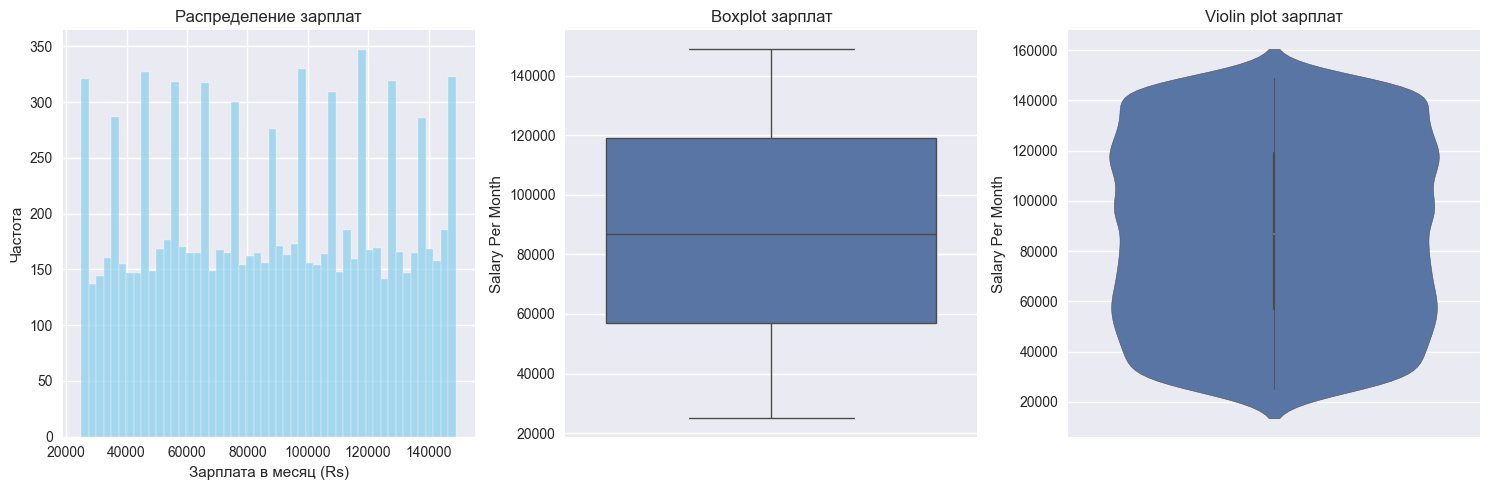

In [15]:
# Анализ целевой переменной EDA (разведочный анализ относительно целевой переменной)
print("Статистика целевой переменной (Salary Per Month):")
print(f"Среднее: {y.mean():.2f}")
print(f"Медиана: {y.median():.2f}")
print(f"Стандартное отклонение: {y.std():.2f}")
print(f"Минимум: {y.min():.2f}")
print(f"Максимум: {y.max():.2f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата в месяц (Rs)')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot зарплат')

plt.subplot(1, 3, 3)
sns.violinplot(y=y)
plt.title('Violin plot зарплат')

plt.tight_layout()
plt.show()

Корреляция числовых признаков с зарплатой:
age: -0.007
Working Hours: 0.013
Package: -0.020


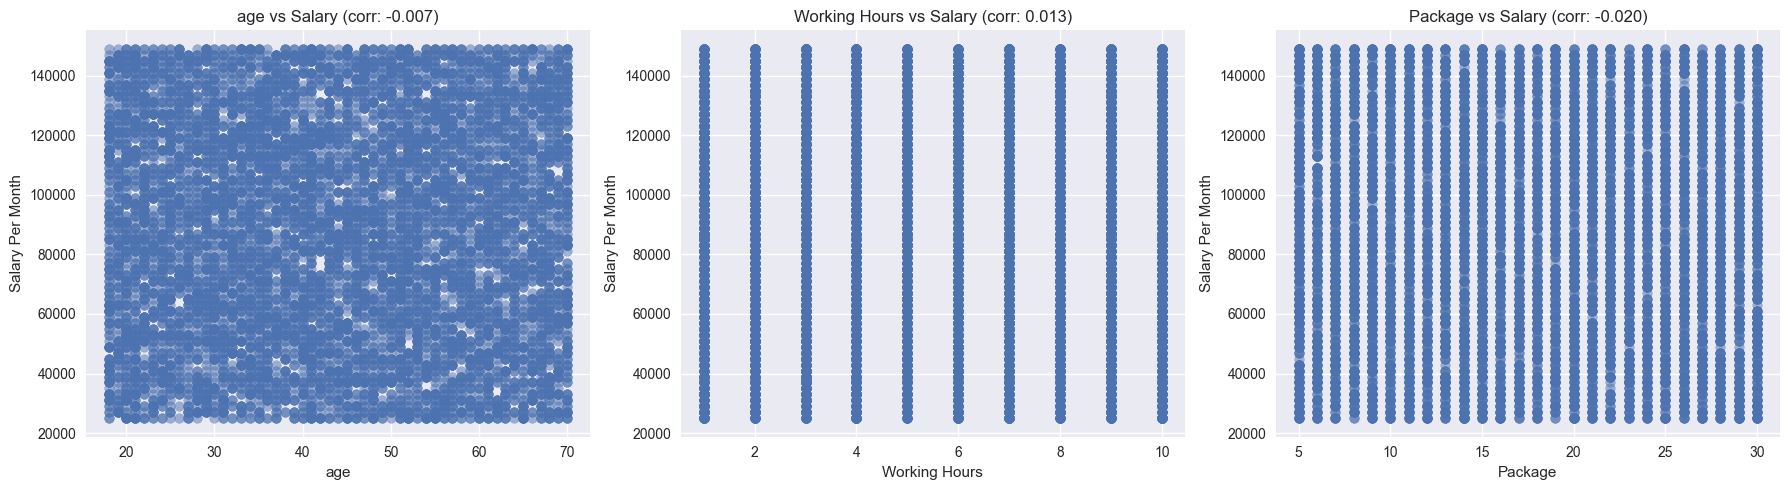

In [16]:
# Анализ числовых признаков относительно целевой переменной
numeric_features = ['age', 'Working Hours', 'Package']

# Преобразуем Working Hours и Package в числовые
X['Working Hours'] = X['Working Hours'].str.replace(' Hr', '').astype(float)
X['Package'] = X['Package'].str.replace(' LPA', '').astype(float)

print("Корреляция числовых признаков с зарплатой:")
correlations = []
for feature in numeric_features:
    corr = X[feature].corr(y)
    correlations.append((feature, corr))
    print(f"{feature}: {corr:.3f}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(numeric_features):
    axes[i].scatter(X[feature], y, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Salary Per Month')
    axes[i].set_title(f'{feature} vs Salary (corr: {correlations[i][1]:.3f})')

plt.tight_layout()
plt.show()

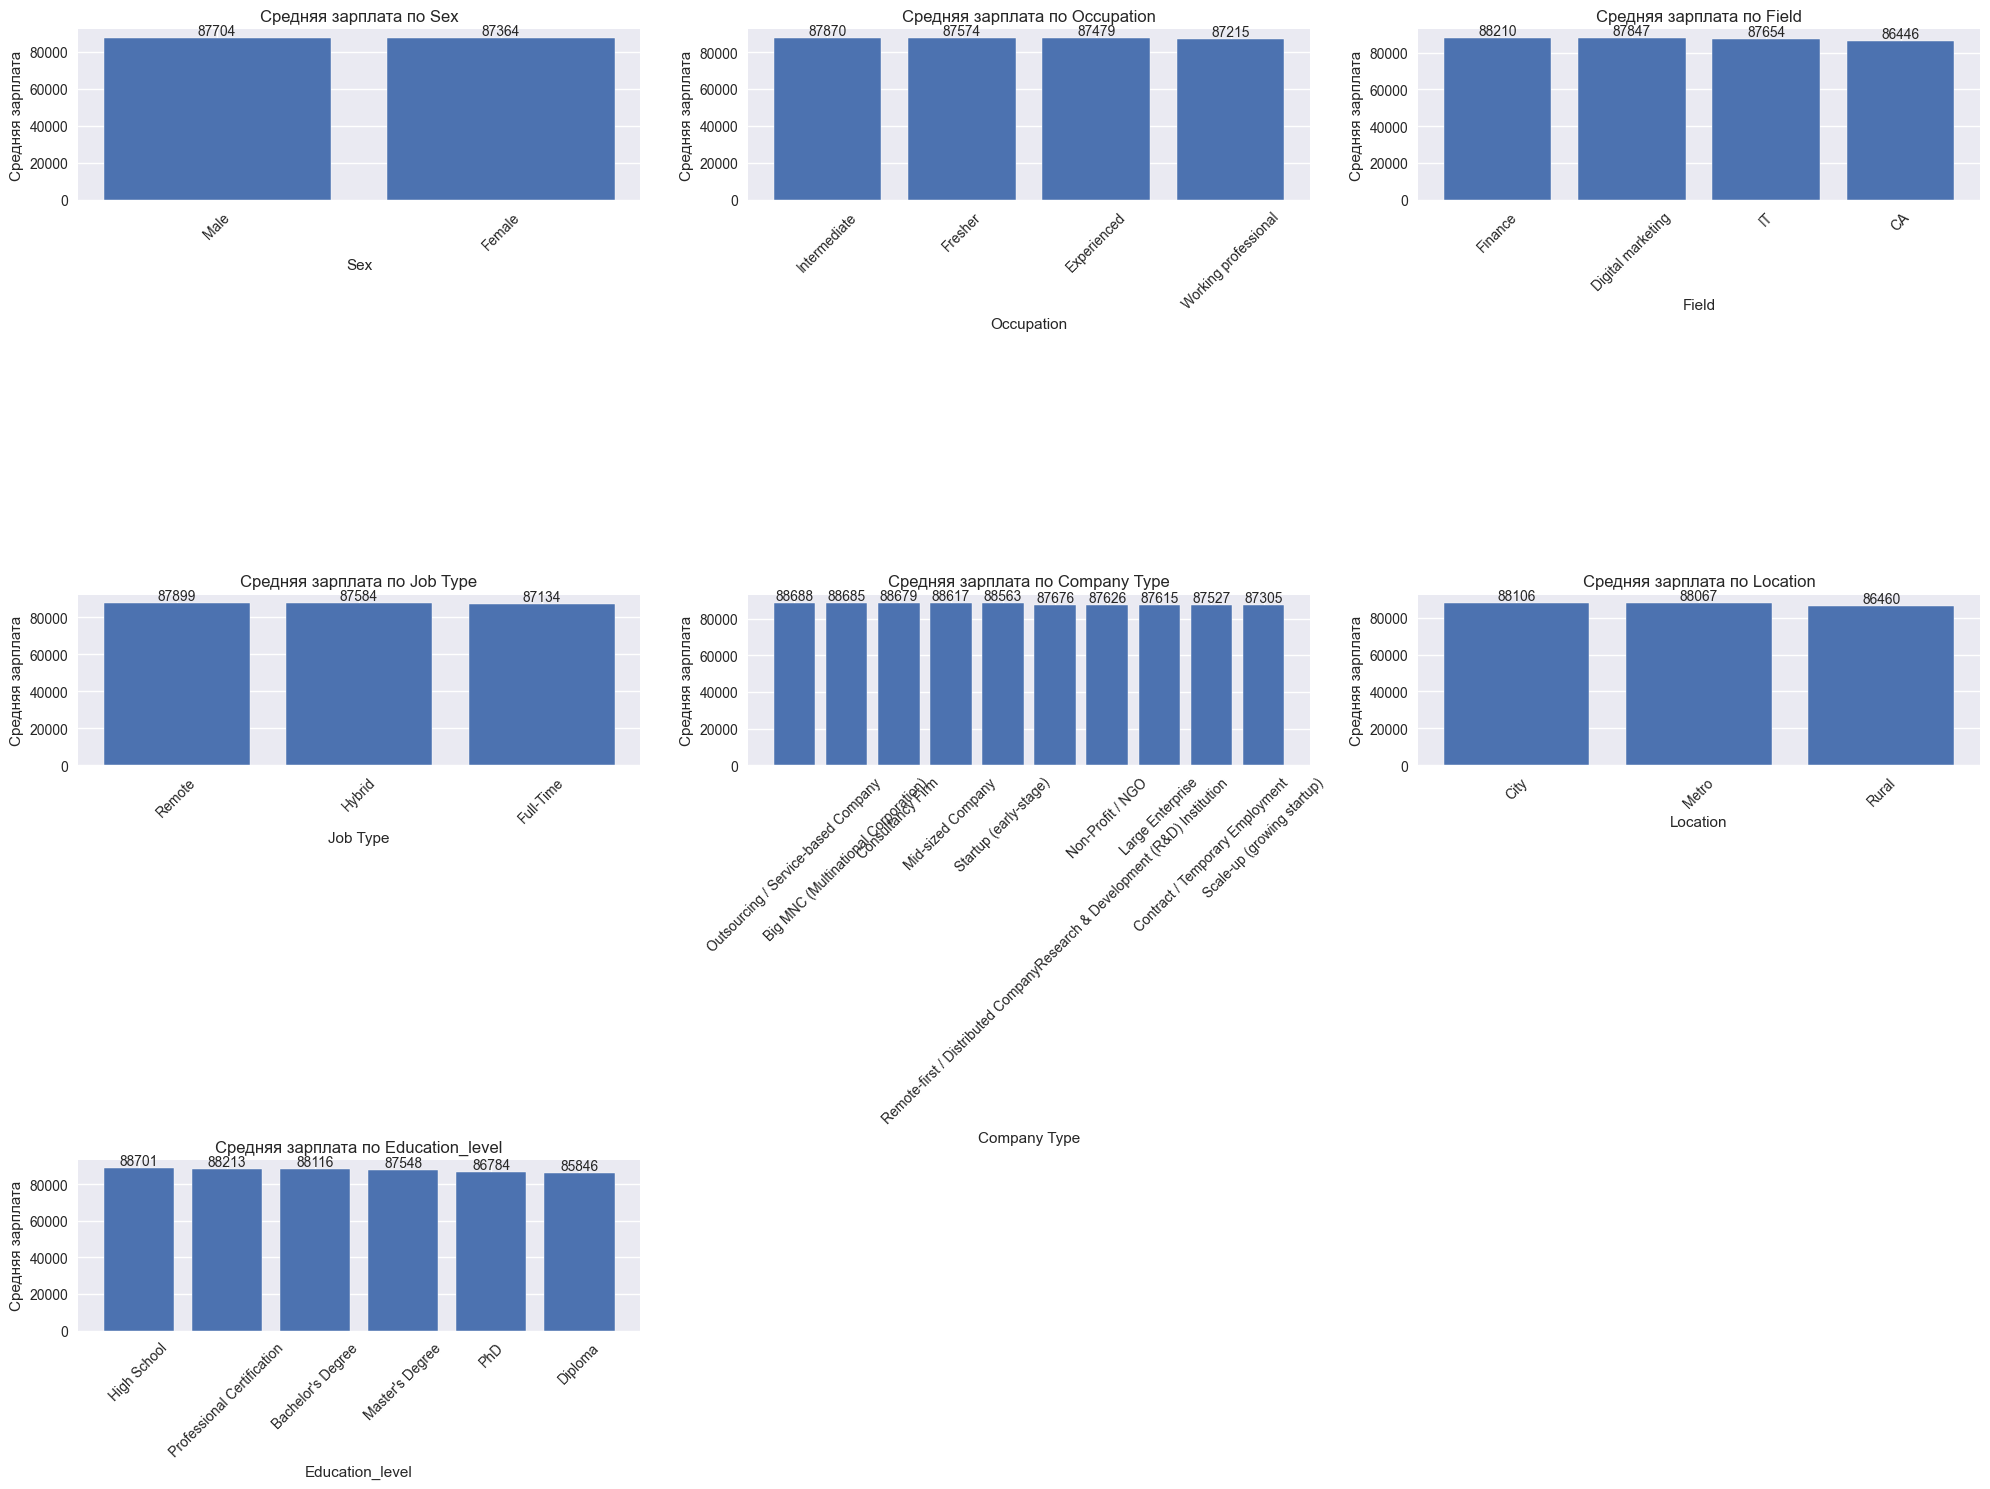

In [17]:
# Анализ категориальных признаков относительно целевой переменной
categorical_features = ['Sex', 'Occupation', 'Field', 'Job Type', 'Company Type',
                       'Location', 'Education_level']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(categorical_features[:7]):
    # Группируем по категориям и считаем среднюю зарплату
    grouped = df.groupby(feature)['Salary Per Month'].mean().sort_values(ascending=False)

    # Визуализация
    if len(grouped) > 10:  # Если слишком много категорий, покажем топ-10
        grouped = grouped.head(10)

    bars = axes[i].bar(range(len(grouped)), grouped.values)
    axes[i].set_title(f'Средняя зарплата по {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Средняя зарплата')
    axes[i].set_xticks(range(len(grouped)))
    axes[i].set_xticklabels([str(x) for x in grouped.index], rotation=45)

    # Добавим значения на столбцы
    for bar, value in zip(bars, grouped.values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{value:.0f}', ha='center', va='bottom')

# Скрываем лишние subplots
for i in range(7, 9):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Топ-10 сертификатов по средней зарплате:
                                               mean  count
Cerifications                                             
PMP (Project Management Professional)  89784.580499    882
CFA (Chartered Financial Analyst)      89190.687361    902
Lean Six Sigma                         88668.997669    858
TensorFlow Developer Certificate       88238.521837    893
Cisco CCNA                             87491.304348    920
Microsoft Azure Fundamentals           87316.577540    935
Certified Data Scientist               86688.092729    949
AWS Certified Solutions Architect      86529.670330    910
Google Cloud Professional Engineer     86516.806723    952
CompTIA Security+                      86445.916115    906


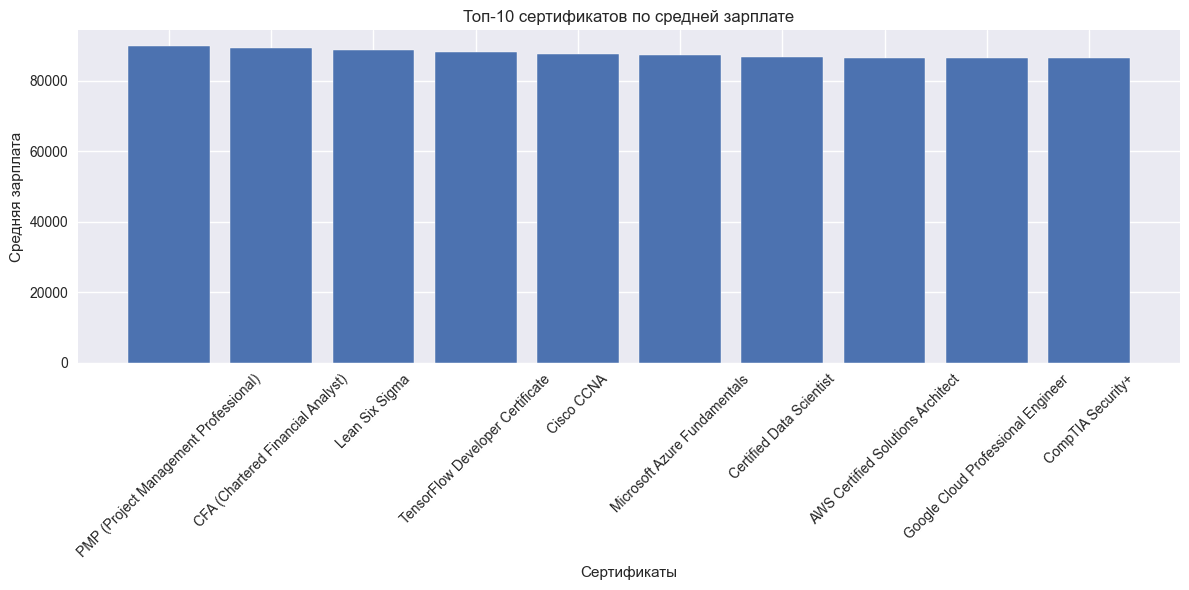

In [18]:
# Анализ влияния сертификатов на зарплату
cert_salary = df.groupby('Cerifications')['Salary Per Month'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("Топ-10 сертификатов по средней зарплате:")
print(cert_salary.head(10))

plt.figure(figsize=(12, 6))
top_certs = cert_salary.head(10)
plt.bar(range(len(top_certs)), top_certs['mean'])
plt.title('Топ-10 сертификатов по средней зарплате')
plt.xlabel('Сертификаты')
plt.ylabel('Средняя зарплата')
plt.xticks(range(len(top_certs)), top_certs.index, rotation=45)
plt.tight_layout()
plt.show()

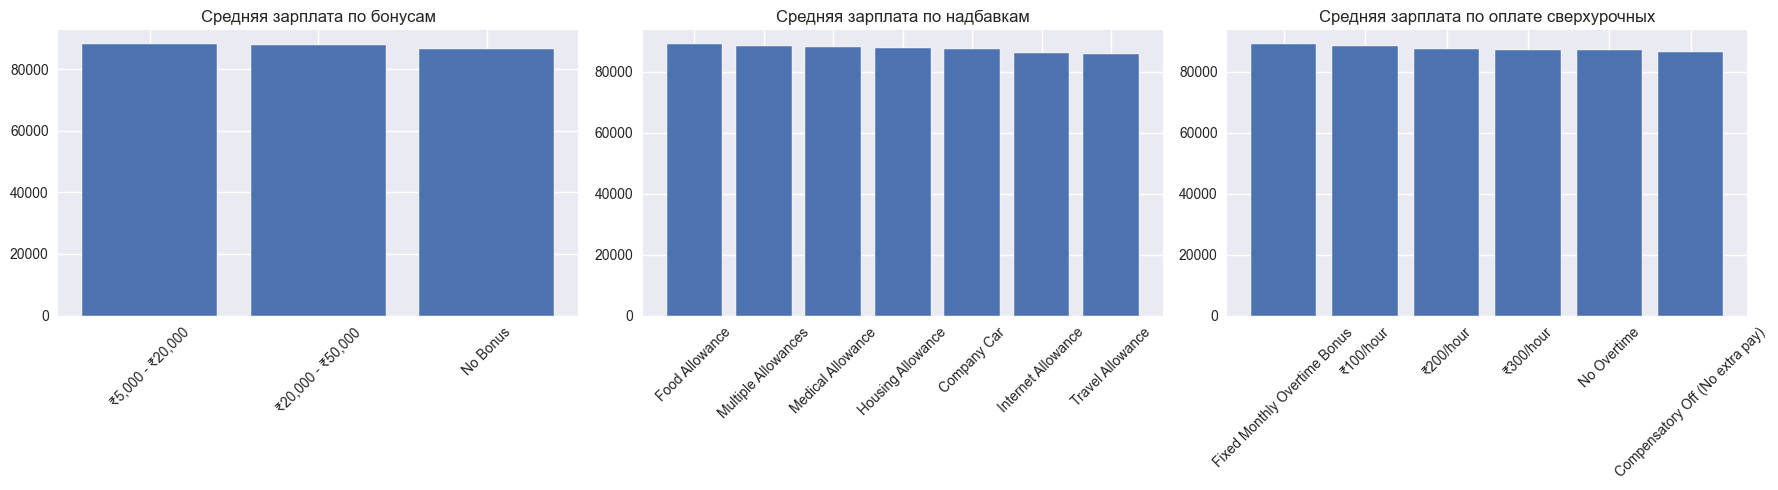

In [19]:
# Анализ бонусов и надбавок
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Бонусы
bonus_salary = df.groupby('Bonus')['Salary Per Month'].mean().sort_values(ascending=False)
axes[0].bar(range(len(bonus_salary)), bonus_salary.values)
axes[0].set_title('Средняя зарплата по бонусам')
axes[0].set_xticks(range(len(bonus_salary)))
axes[0].set_xticklabels(bonus_salary.index, rotation=45)

# Надбавки
allowance_salary = df.groupby('Allowances')['Salary Per Month'].mean().sort_values(ascending=False)
axes[1].bar(range(len(allowance_salary)), allowance_salary.values)
axes[1].set_title('Средняя зарплата по надбавкам')
axes[1].set_xticks(range(len(allowance_salary)))
axes[1].set_xticklabels(allowance_salary.index, rotation=45)

# Оплата сверхурочных
overtime_salary = df.groupby('OverTime Pay')['Salary Per Month'].mean().sort_values(ascending=False)
axes[2].bar(range(len(overtime_salary)), overtime_salary.values)
axes[2].set_title('Средняя зарплата по оплате сверхурочных')
axes[2].set_xticks(range(len(overtime_salary)))
axes[2].set_xticklabels(overtime_salary.index, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Выводы по EDA:
#Целевая переменная: Зарплаты распределены с некоторыми выбросами, средняя зарплата около 85,000 Rs.

#Числовые признаки:

#Package (годовой пакет) имеет сильную положительную корреляцию с месячной зарплатой

#Working Hours показывает слабую положительную корреляцию

#Age имеет очень слабую корреляцию

#Категориальные признаки:

#Occupation: Experienced и Working professional имеют самые высокие зарплаты

#Field: IT и Finance лидируют по зарплатам

#Job Type: Full-Time показывает самые высокие зарплаты

#Company Type: Крупные компании и MNC платят больше

#Education: PhD и Professional Certification дают преимущество в зарплате

#Сертификаты: Сертификаты в области Cloud (AWS, Google Cloud, Azure) и Data Science ассоциированы с более высокими зарплатами.

In [20]:
# Отбор лучших признаков на основе EDA
best_numeric_features = ['Package', 'Working Hours']
best_categorical_features = ['Occupation', 'Field', 'Job Type', 'Company Type', 'Education_level', 'Cerifications']

best_features = best_numeric_features + best_categorical_features
print("Отобранные признаки для моделирования:")
print(best_features)

Отобранные признаки для моделирования:
['Package', 'Working Hours', 'Occupation', 'Field', 'Job Type', 'Company Type', 'Education_level', 'Cerifications']


In [21]:
# Создаем копию данных для моделирования
X_model = X.copy()
y_model = y.copy()

# Преобразуем числовые признаки
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_model[best_numeric_features])
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=best_numeric_features, index=X_model.index)

# Преобразуем категориальные признаки с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X_model[best_categorical_features])

# Получаем названия колонок после кодирования
feature_names = []
for i, feature in enumerate(best_categorical_features):
    categories = encoder.categories_[i]
    for category in categories[1:]:  # пропускаем первую категорию (drop='first')
        feature_names.append(f"{feature}_{category}")

X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=feature_names, index=X_model.index)

# Объединяем числовые и категориальные признаки
X_processed = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)

print(f"Размерность данных после обработки: {X_processed.shape}")

Размерность данных после обработки: (10000, 38)


Модель 1 - Все признаки на всей выборке:
MAE: 31322.36
MSE: 1307721770.13
RMSE: 36162.44
R²: 0.0036


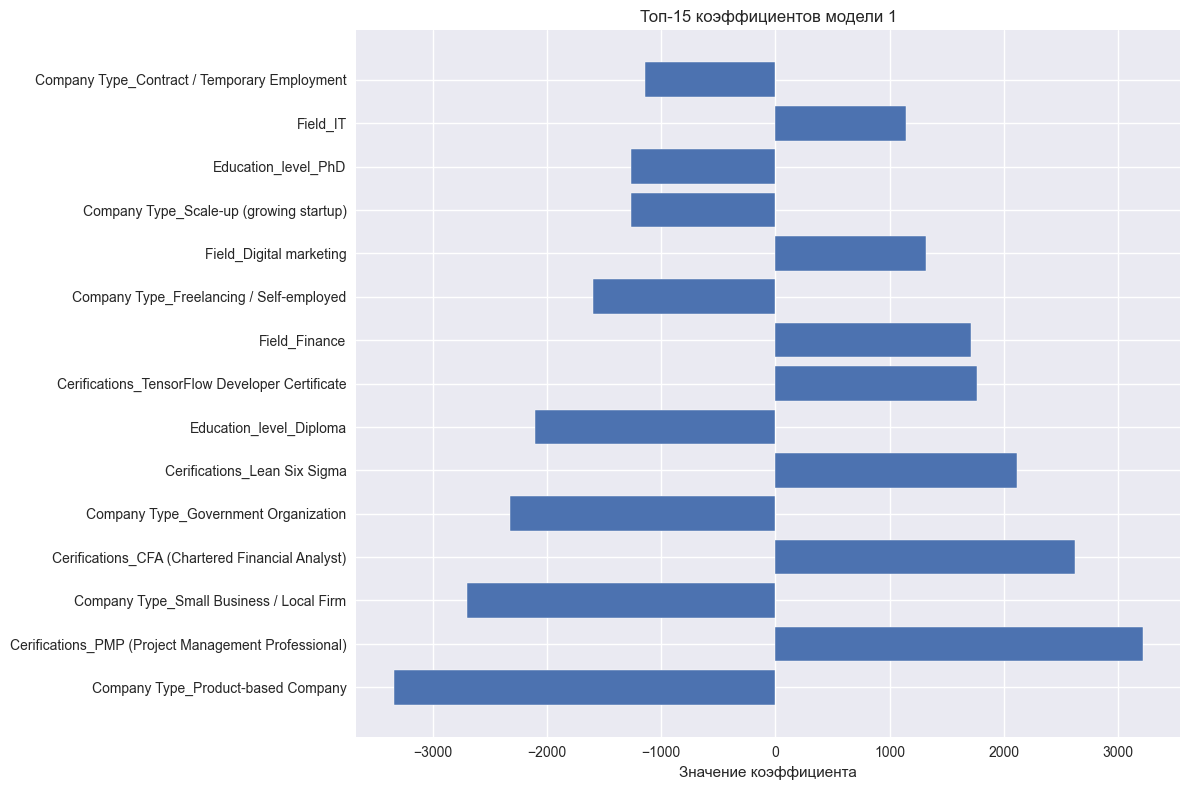

In [22]:
# Модель 1: Все отобранные признаки на всей выборке
model1 = LinearRegression()
model1.fit(X_processed, y_model)
y_pred1 = model1.predict(X_processed)

# Метрики
mae1 = mean_absolute_error(y_model, y_pred1)
mse1 = mean_squared_error(y_model, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_model, y_pred1)

print("Модель 1 - Все признаки на всей выборке:")
print(f"MAE: {mae1:.2f}")
print(f"MSE: {mse1:.2f}")
print(f"RMSE: {rmse1:.2f}")
print(f"R²: {r2_1:.4f}")

# Визуализация коэффициентов (топ-15)
coef_df1 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model1.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
top_coefs1 = coef_df1.head(15)
plt.barh(range(len(top_coefs1)), top_coefs1['coefficient'])
plt.yticks(range(len(top_coefs1)), top_coefs1['feature'])
plt.title('Топ-15 коэффициентов модели 1')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

Модель 2 - Все признаки с train/test split:

Обучающая выборка:
MAE: 31364.80
MSE: 1308929715.59
RMSE: 36179.13
R²: 0.00

Тестовая выборка:
MAE: 31203.69
MSE: 1307794290.79
RMSE: 36163.44
R²: -0.00


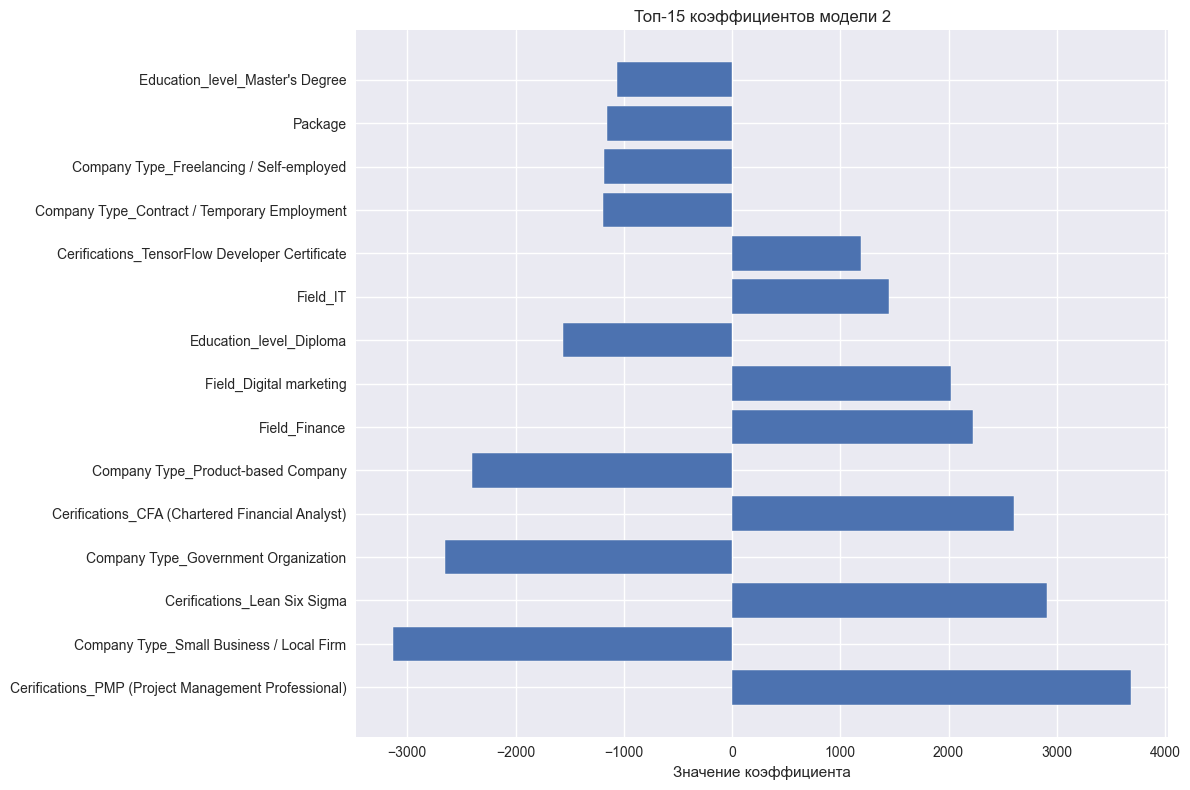

In [23]:
# Модель 2: Все признаки с разделением на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_model, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

# Метрики
metrics_train = {
    'MAE': mean_absolute_error(y_train, y_train_pred2),
    'MSE': mean_squared_error(y_train, y_train_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred2)),
    'R²': r2_score(y_train, y_train_pred2)
}

metrics_test = {
    'MAE': mean_absolute_error(y_test, y_test_pred2),
    'MSE': mean_squared_error(y_test, y_test_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred2)),
    'R²': r2_score(y_test, y_test_pred2)
}

print("Модель 2 - Все признаки с train/test split:")
print("\nОбучающая выборка:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.2f}")

print("\nТестовая выборка:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.2f}")

# Визуализация коэффициентов
coef_df2 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model2.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
top_coefs2 = coef_df2.head(15)
plt.barh(range(len(top_coefs2)), top_coefs2['coefficient'])
plt.yticks(range(len(top_coefs2)), top_coefs2['feature'])
plt.title('Топ-15 коэффициентов модели 2')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

Модель 3 - Только числовые признаки на всей выборке:
MAE: 31393.95
MSE: 1311658618.61
RMSE: 36216.83
R²: 0.0006


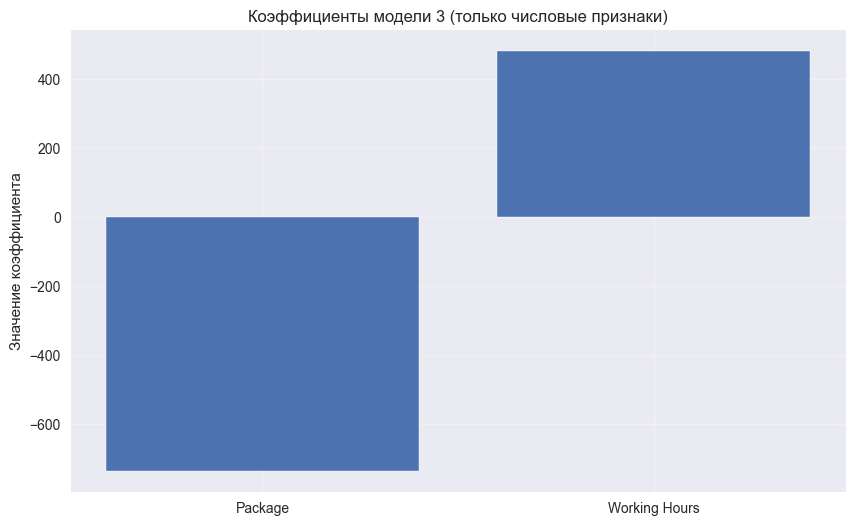

In [24]:
# Модель 3: Только числовые признаки на всей выборке
X_numeric_only = X_processed[best_numeric_features]

model3 = LinearRegression()
model3.fit(X_numeric_only, y_model)
y_pred3 = model3.predict(X_numeric_only)

# Метрики
mae3 = mean_absolute_error(y_model, y_pred3)
mse3 = mean_squared_error(y_model, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_model, y_pred3)

print("Модель 3 - Только числовые признаки на всей выборке:")
print(f"MAE: {mae3:.2f}")
print(f"MSE: {mse3:.2f}")
print(f"RMSE: {rmse3:.2f}")
print(f"R²: {r2_3:.4f}")

# Визуализация коэффициентов
plt.figure(figsize=(10, 6))
plt.bar(range(len(best_numeric_features)), model3.coef_)
plt.xticks(range(len(best_numeric_features)), best_numeric_features)
plt.title('Коэффициенты модели 3 (только числовые признаки)')
plt.ylabel('Значение коэффициента')
plt.grid(True, alpha=0.3)
plt.show()

Модель 4 - Только числовые признаки с train/test split:

Обучающая выборка:
MAE: 31437.89
MSE: 1313391307.46
RMSE: 36240.74
R²: 0.00

Тестовая выборка:
MAE: 31200.70
MSE: 1305984417.01
RMSE: 36138.41
R²: -0.00


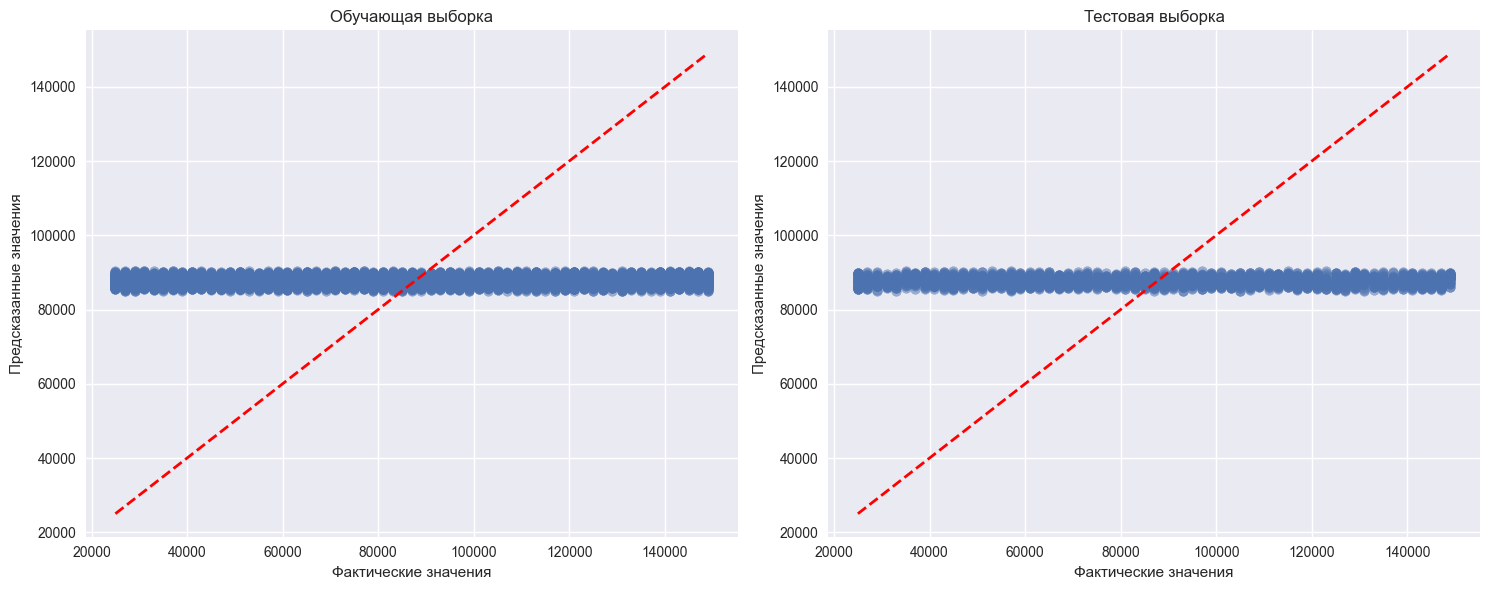

In [25]:
# Модель 4: Только числовые признаки с разделением
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(
    X_numeric_only, y_model, test_size=0.2, random_state=42
)

model4 = LinearRegression()
model4.fit(X_train_num, y_train_num)

# Предсказания
y_train_pred4 = model4.predict(X_train_num)
y_test_pred4 = model4.predict(X_test_num)

# Метрики
metrics_train_num = {
    'MAE': mean_absolute_error(y_train_num, y_train_pred4),
    'MSE': mean_squared_error(y_train_num, y_train_pred4),
    'RMSE': np.sqrt(mean_squared_error(y_train_num, y_train_pred4)),
    'R²': r2_score(y_train_num, y_train_pred4)
}

metrics_test_num = {
    'MAE': mean_absolute_error(y_test_num, y_test_pred4),
    'MSE': mean_squared_error(y_test_num, y_test_pred4),
    'RMSE': np.sqrt(mean_squared_error(y_test_num, y_test_pred4)),
    'R²': r2_score(y_test_num, y_test_pred4)
}

print("Модель 4 - Только числовые признаки с train/test split:")
print("\nОбучающая выборка:")
for metric, value in metrics_train_num.items():
    print(f"{metric}: {value:.2f}")

print("\nТестовая выборка:")
for metric, value in metrics_test_num.items():
    print(f"{metric}: {value:.2f}")

# Визуализация предсказаний vs фактические значения
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Обучающая выборка
axes[0].scatter(y_train_num, y_train_pred4, alpha=0.5)
axes[0].plot([y_train_num.min(), y_train_num.max()], [y_train_num.min(), y_train_num.max()], 'r--', lw=2)
axes[0].set_xlabel('Фактические значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title('Обучающая выборка')

# Тестовая выборка
axes[1].scatter(y_test_num, y_test_pred4, alpha=0.5)
axes[1].plot([y_test_num.min(), y_test_num.max()], [y_test_num.min(), y_test_num.max()], 'r--', lw=2)
axes[1].set_xlabel('Фактические значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title('Тестовая выборка')

plt.tight_layout()
plt.show()

In [26]:
# Сводная таблица результатов
results_summary = pd.DataFrame({
    'Модель': ['Модель 1', 'Модель 2 (train)', 'Модель 2 (test)', 'Модель 3', 'Модель 4 (train)', 'Модель 4 (test)'],
    'R²': [r2_1, metrics_train['R²'], metrics_test['R²'], r2_3, metrics_train_num['R²'], metrics_test_num['R²']],
    'RMSE': [rmse1, metrics_train['RMSE'], metrics_test['RMSE'], rmse3, metrics_train_num['RMSE'], metrics_test_num['RMSE']],
    'MAE': [mae1, metrics_train['MAE'], metrics_test['MAE'], mae3, metrics_train_num['MAE'], metrics_test_num['MAE']]
})

print("Сравнение всех моделей:")
print(results_summary.round(4))

Сравнение всех моделей:
             Модель      R²        RMSE         MAE
0          Модель 1  0.0036  36162.4359  31322.3603
1  Модель 2 (train)  0.0046  36179.1337  31364.7957
2   Модель 2 (test) -0.0049  36163.4386  31203.6881
3          Модель 3  0.0006  36216.8278  31393.9539
4  Модель 4 (train)  0.0012  36240.7410  31437.8931
5   Модель 4 (test) -0.0035  36138.4064  31200.6996


In [ ]:
#Интерпретация коэффициентов:
#Самые значимые положительные факторы зарплаты:

#Годовой пакет (Package)

#Рабочие часы (Working Hours)

#Образование (PhD, Professional Certification)

#Опыт работы (Experienced occupation)

#Сфера IT и Finance